In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [112]:
from sklearn.datasets import make_classification

In [170]:
X,y = make_classification(n_samples=100,n_features=2,n_classes=2,n_clusters_per_class=1,n_informative=1
                          ,n_redundant=0)

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()

In [175]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
from scipy.spatial import Voronoi,voronoi_plot_2d

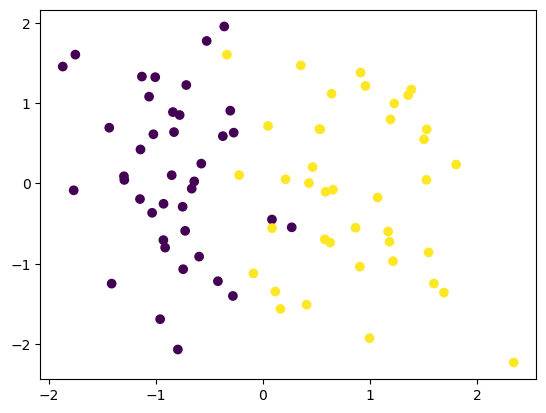

In [177]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

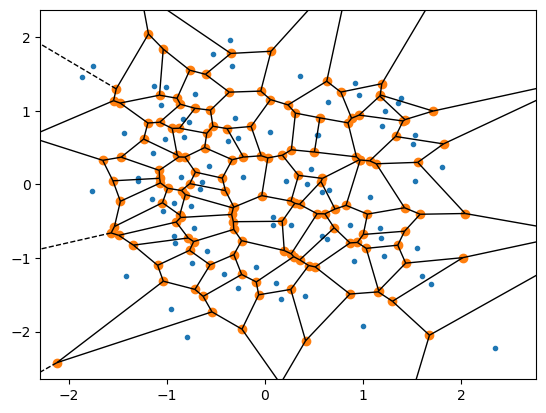

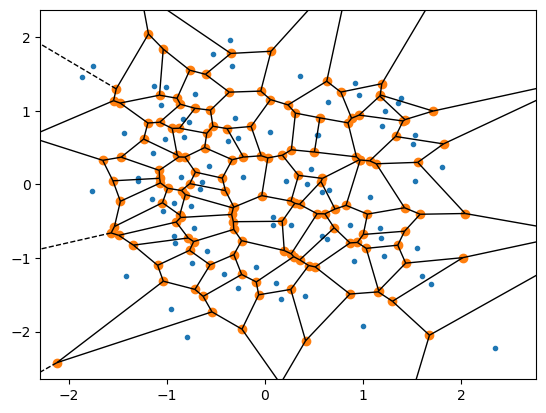

In [178]:
vor = Voronoi(X_train)
voronoi_plot_2d(vor)

In [179]:
import operator
from collections import Counter

In [213]:
class KNN:
    
    def __init__(self,k=3):
        self.k = k
    
    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def classify(self,distance):
        
        label = []
        
        for i in distance:
            label.append(self.y_train[i[0]])
            
        return Counter(label).most_common()[0][0]
        
    def predict(self,X_test):
        
        y_pred = []
        
        for i in X_test:
            distance = {}
            counter = 0
            for j in self.X_train:
                distance[counter] = np.linalg.norm(i - j)
                counter += 1
            distance = sorted(distance.items(),key=operator.itemgetter(1))
            y_pred.append(self.classify(distance[:self.k]))
        
        y_pred = np.array(y_pred)
        
        return y_pred
        
                

In [219]:
knn = KNN(k=5)

In [220]:
knn.fit(X_train,y_train)

In [221]:
y_pred = knn.predict(X_test)

In [222]:
from sklearn.metrics import accuracy_score

In [223]:
accuracy_score(y_test,y_pred)

0.95

In [203]:
accuracy = []
for i in range(1,X_train.shape[0]+1):
    knn = KNN(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))    

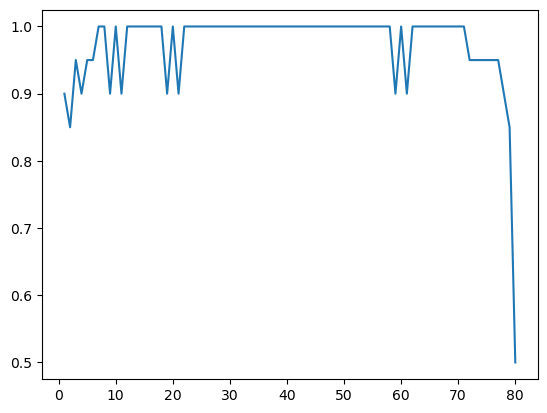

In [206]:
plt.plot(range(1,X_train.shape[0]+1),accuracy)

In [262]:
def decision_boundary():
    knn = KNN()
    knn.fit(X_train,y_train)
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
    plt.show()

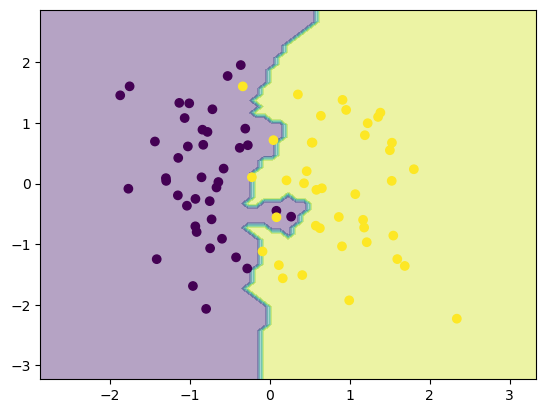

In [263]:
decision_boundary()